C:\Users\admin\AppData\Local\Temp\ipykernel_15584\2593473914.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=country_counts.head(15), x='count', y='country', palette='magma')


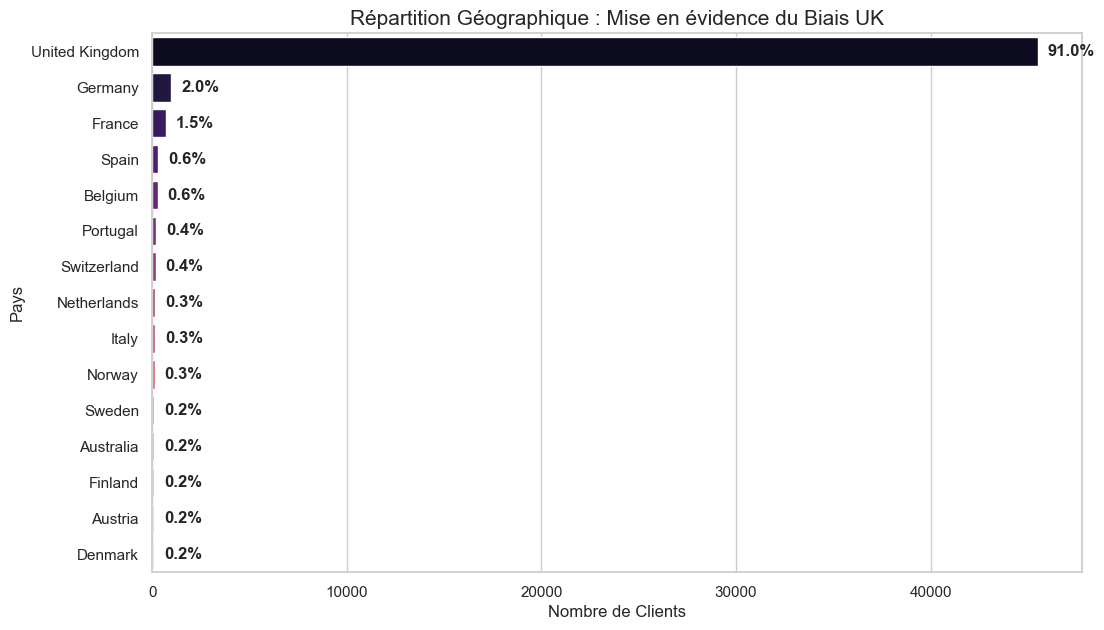

C:\Users\admin\AppData\Local\Temp\ipykernel_15584\2593473914.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_filtered, x='country', y='avg_basket', palette='Set3')


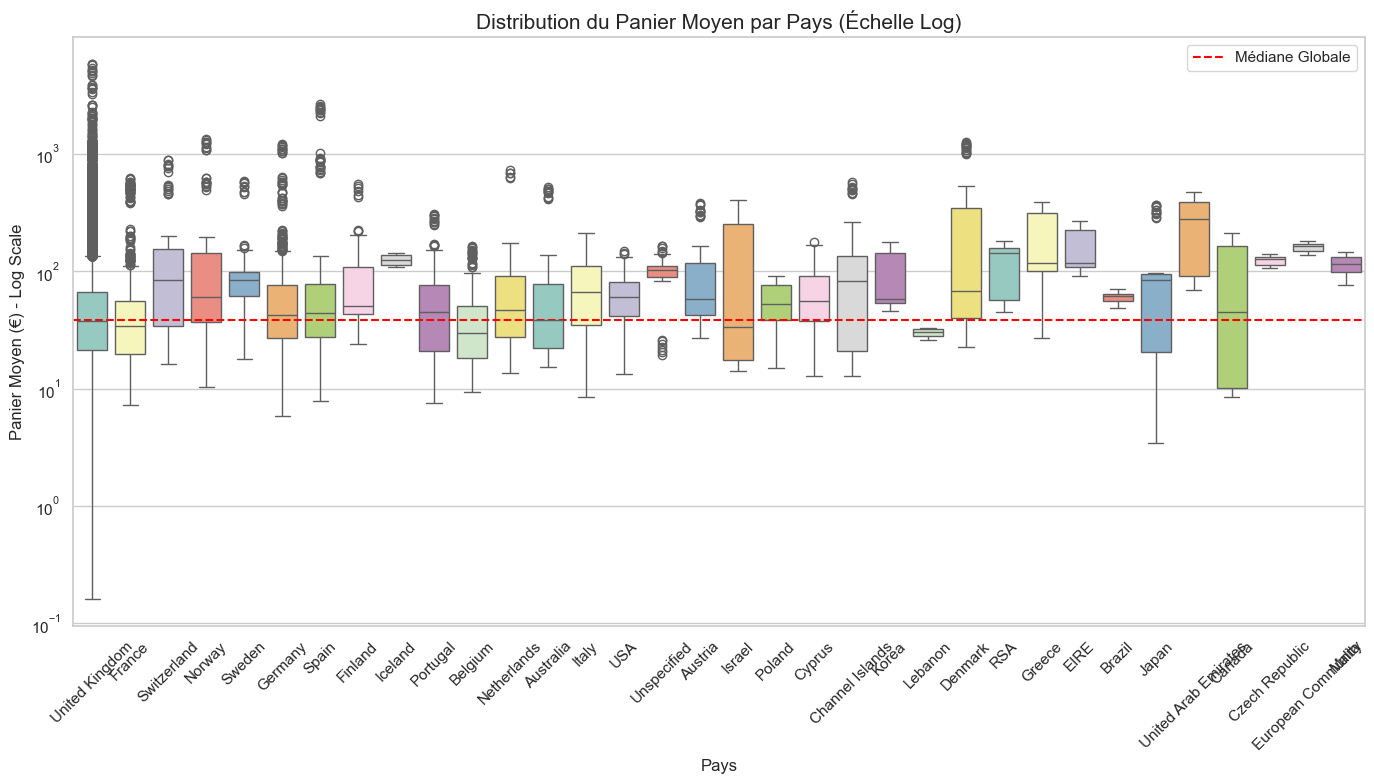

Nombre total de pays : 40
Poids du UK : 91.01%


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Configuration esthétique
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

# 1. Chargement des données
df = pd.read_csv('customers.csv')

# --- VISUALISATION 1 : Visualisation du Biais (Distribution par Pays) ---
country_counts = df['country'].value_counts().reset_index()
country_counts.columns = ['country', 'count']
country_counts['percent'] = (country_counts['count'] / len(df)) * 100

plt.figure(figsize=(12, 7))
# On affiche le Top 15 pour garder de la lisibilité
sns.barplot(data=country_counts.head(15), x='count', y='country', palette='magma')

# Ajout des étiquettes de pourcentage pour illustrer le biais
for i, p in enumerate(country_counts.head(15).itertuples()):
    plt.text(p.count + 500, i, f'{p.percent:.1f}%', va='center', fontweight='bold')

plt.title('Répartition Géographique : Mise en évidence du Biais UK', fontsize=15)
plt.xlabel('Nombre de Clients')
plt.ylabel('Pays')
plt.show()

# --- VISUALISATION 2 : Comparaison des Comportements (KPIs) ---
# On ne garde que les pays avec au moins 10 clients pour la pertinence statistique
min_sample = 10
top_countries = country_counts[country_counts['count'] >= min_sample]['country']
df_filtered = df[df['country'].isin(top_countries)]

plt.figure(figsize=(14, 8))
# Utilisation de boxplot pour voir la dispersion et les outliers (Cours Doc 2)
sns.boxplot(data=df_filtered, x='country', y='avg_basket', palette='Set3')

# Échelle Log car les écarts sont massifs (grossistes vs particuliers)
plt.yscale('log')
plt.xticks(rotation=45)
plt.title('Distribution du Panier Moyen par Pays (Échelle Log)', fontsize=15)
plt.ylabel('Panier Moyen (€) - Log Scale')
plt.xlabel('Pays')

# Ligne de référence (médiane globale)
plt.axhline(df['avg_basket'].median(), color='red', linestyle='--', label='Médiane Globale')
plt.legend()
plt.tight_layout()
plt.show()

# --- SYNTHÈSE STATISTIQUE ---
print(f"Nombre total de pays : {len(country_counts)}")
print(f"Poids du UK : {country_counts.iloc[0]['percent']:.2f}%")